# Importation de library:

Importation de bibliothéques qui seront utilisé tout au long du notebook.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_validate
from scipy import optimize

# Chargement de données 


In [2]:
dataset_folder = "C:/Users/samsung/Desktop/Nouveau dossier/Etude de Cas Decisionnelle/data"
meta = pd.read_csv(f"{dataset_folder}/training_set_metadata.csv")
lc = pd.read_csv(f"{dataset_folder}/training_set.csv")

In [3]:
meta.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [4]:
lc.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


# Exploration et traitement de données

 Exploration des données du fichiers MetaData

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11A73690>,
      dtype=object)

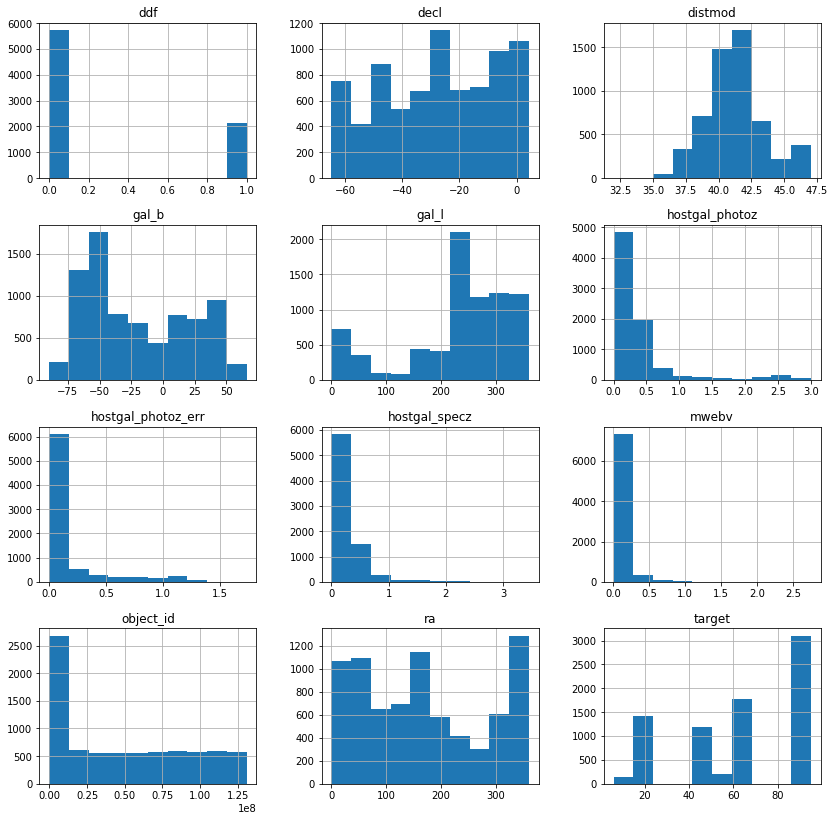

In [5]:
meta.hist(figsize=(14,14))

,6,15,16,42,52,53,62,64,65,67,88,90,92,95
MicroLensing,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Explosive_V,NaN,495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transits,NaN,NaN,924.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Explosive_W,NaN,NaN,NaN,1193.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Explosive_X,NaN,NaN,NaN,NaN,183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Long Periodic,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Explosive_Y,NaN,NaN,NaN,NaN,NaN,NaN,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Near Burst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN
Flare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,981.0,NaN,NaN,NaN,NaN,NaN
Explosive_Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.0,NaN,NaN,NaN,NaN


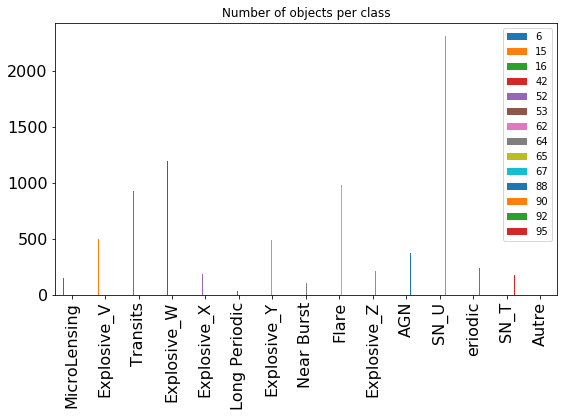

In [6]:
df_class = pd.DataFrame([
                         meta[meta.target==6]['target'].value_counts(),
                         meta[meta.target==15]['target'].value_counts(),
                         meta[meta.target==16]['target'].value_counts(),
                         meta[meta.target==42]['target'].value_counts(),
                         meta[meta.target==52]['target'].value_counts(),
                         meta[meta.target==53]['target'].value_counts(),
                         meta[meta.target==62]['target'].value_counts(),
                         meta[meta.target==64]['target'].value_counts(),
                         meta[meta.target==65]['target'].value_counts(),
                         meta[meta.target==67]['target'].value_counts(),
                         meta[meta.target==88]['target'].value_counts(),
                         meta[meta.target==90]['target'].value_counts(),
                         meta[meta.target==92]['target'].value_counts(),
                         meta[meta.target==95]['target'].value_counts(),
                         meta[meta.target==99]['target'].value_counts(),
                        ])
df_class.index = ['MicroLensing','Explosive_V','Transits',              'Explosive_W','Explosive_X','Long Periodic',
              'Explosive_Y','Near Burst','Flare',
              'Explosive_Z','AGN','SN_U',
              'eriodic','SN_T','Autre',]
display(df_class)
df_class.plot(kind="bar", fontsize=16,
                figsize=(9, 5),title="Number of objects per class")

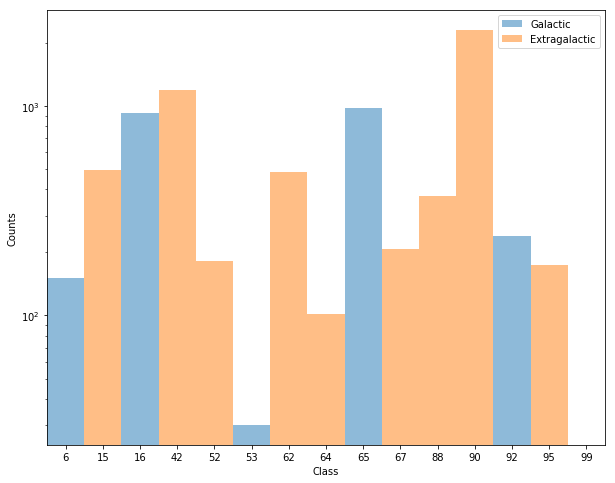

In [7]:
targets = np.hstack([np.unique(meta['target']), [99]])
target_map = {j:i for i, j in enumerate(targets)}
target_ids = [target_map[i] for i in meta['target']]
meta['target_id'] = target_ids
galactic_cut = meta['hostgal_specz'] == 0
plt.figure(figsize=(10, 8))
plt.hist(meta[galactic_cut]['target_id'], 15, (0, 15), alpha=0.5, label='Galactic')
plt.hist(meta[~galactic_cut]['target_id'], 15, (0, 15), alpha=0.5, label='Extragalactic')
plt.xticks(np.arange(15)+0.5, targets)
plt.gca().set_yscale("log")
plt.xlabel('Class')
plt.ylabel('Counts')
plt.xlim(0, 15)
plt.legend();

In [8]:
meta1=meta[meta.isnull().any(axis=1)]
meta1


,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,target_id
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92,12
5,1227,35.683594,-5.379379,171.992947,-59.253501,1,0.0,0.0,0.0,NaN,0.020,65,8
9,1926,149.414062,1.940072,236.565366,41.393323,1,0.0,0.0,0.0,NaN,0.018,65,8
14,2624,346.655182,-63.260487,320.952196,-50.040935,1,0.0,0.0,0.0,NaN,0.019,65,8
15,2677,53.964844,-28.630989,225.142950,-53.813613,1,0.0,0.0,0.0,NaN,0.009,16,2
24,4171,2.097458,-45.783966,324.737840,-69.478613,1,0.0,0.0,0.0,NaN,0.011,16,2
32,6266,0.929752,-44.597992,328.531426,-70.083244,1,0.0,0.0,0.0,NaN,0.011,65,8
39,7566,359.446716,-44.201530,331.730015,-69.805709,1,0.0,0.0,0.0,NaN,0.010,16,2
42,7756,149.414062,2.238686,236.239766,41.565558,1,0.0,0.0,0.0,NaN,0.017,16,2
44,8688,32.695312,-4.929937,166.868469,-60.841230,1,0.0,0.0,0.0,NaN,0.018,65,8


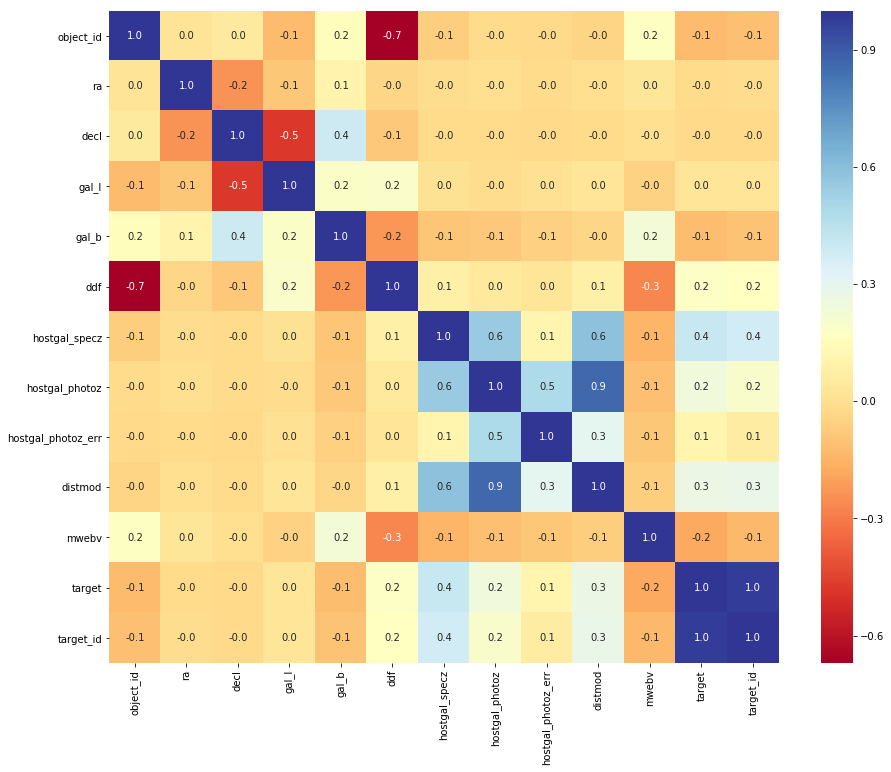

In [9]:
plt.figure(figsize=(15,12))
sns.heatmap(meta.corr(), annot=True, fmt=".1f", cmap="RdYlBu");

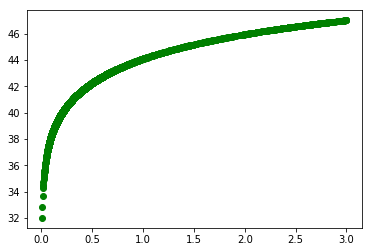

In [10]:
# distmod is in fact computed on hostgal_photoz
plt.plot(meta['hostgal_photoz'],meta['distmod'],'o', color='green')

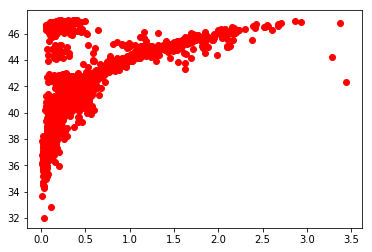

In [11]:
# distmod is in fact computed on hostgal_photoz
plt.plot(meta['hostgal_specz'],meta['distmod'],'o', color='red')

Text(0.5,0,'hostgal_photoz + hostgal_specz')

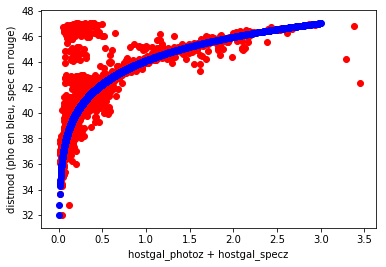

In [12]:
X1=meta['hostgal_specz'].tolist()
X2=meta['hostgal_photoz'].tolist()
plt.scatter(X1,meta['distmod'],color='red')
plt.scatter(X2,meta['distmod'],color='blue')
plt.ylabel('distmod (pho en bleu, spec en rouge)')
plt.xlabel("hostgal_photoz + hostgal_specz")

Text(0,0.5,'distmod')

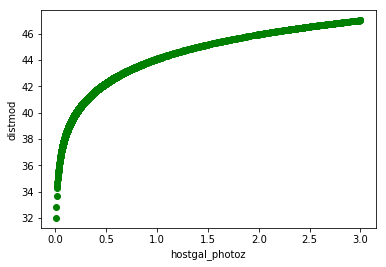

In [13]:
#distmod is in fact computed on hostgal_photoz
distmod1 = meta[~meta.distmod.isna()]
plt.plot(distmod1['hostgal_photoz'],distmod1['distmod'],'o', color='green')
plt.xlabel('hostgal_photoz')
plt.ylabel('distmod')

In [14]:
lm=LinearRegression()
clf=Ridge(alpha=0.9)
X = distmod1[["hostgal_photoz"]]
y = distmod1.distmod
X.loc[:] = (X - X.min())/(X.max() - X.min())
clf.fit(X,y)
score=clf.score(X,y)
#score
X


C:\Users\samsung\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,hostgal_photoz
1,0.541455
2,0.073624
3,0.092030
4,0.078735
6,0.058859
7,0.232362
8,0.105926
10,0.061531
11,0.178748
12,0.915820


In [15]:
import math
distmods = []
for row in meta.itertuples():
    distmod = row.distmod  
    if math.isnan(distmod):
        distmod =clf.predict([[np.sqrt(row.hostgal_photoz)]])[0]
        #print(distmod)
    distmods.append(distmod)   
#distmods



In [37]:
distmodCorrected = meta[["object_id", "ra","decl","gal_l","gal_b","ddf","hostgal_specz", "hostgal_photoz",
                   "hostgal_photoz_err","mwebv","target","target_id"]]
distmodCorrected.loc[:, "distmods_corrige"] = distmods
distmodCorrected.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,mwebv,target,target_id,distmods_corrige
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,0.017,92,12,39.594058
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,0.007,88,10,45.406300
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,0.021,42,3,40.256100
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,0.007,90,11,40.795100
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,0.024,90,11,40.416600


In [17]:
distmod2 = distmodCorrected[distmodCorrected.distmod.isna()]
distmod2.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,target_id,distmods_corrige
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92,12,39.594058
5,1227,35.683594,-5.379379,171.992947,-59.253501,1,0.0,0.0,0.0,NaN,0.020,65,8,39.594058
9,1926,149.414062,1.940072,236.565366,41.393323,1,0.0,0.0,0.0,NaN,0.018,65,8,39.594058
14,2624,346.655182,-63.260487,320.952196,-50.040935,1,0.0,0.0,0.0,NaN,0.019,65,8,39.594058
15,2677,53.964844,-28.630989,225.142950,-53.813613,1,0.0,0.0,0.0,NaN,0.009,16,2,39.594058


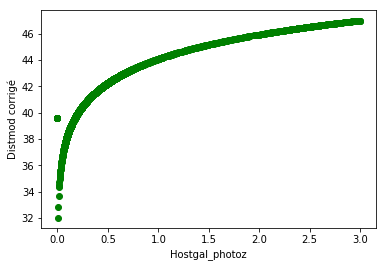

In [18]:
plt.scatter(x=distmodCorrected.hostgal_photoz, y=distmodCorrected.distmods_corrige,color='green');
plt.ylabel("Distmod corrigé");
plt.xlabel("Hostgal_photoz");




Exploration des données du fichiers TraininSet

In [19]:
lc.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [20]:
targetTypes={6:'Microlensing', 15:'Explosive_V', 16:'Transits', 42:'Explosive_W', 52:'Explosive_X', 
                  53:'Long Periodic', 62:'Explosive_Y', 64:'Near Burst', 65:'Flare', 67:'Explosive_Z',
                  88:'AGN', 90:'SN_U', 92:'Periodic', 95:'SN_T'}
#targetTypes

In [21]:
groups = lc.groupby(['object_id', 'passband'])
times = groups.apply(lambda block: block['mjd'].values).reset_index().rename(columns={0: 'seq'})
flux = groups.apply(lambda block: block['flux'].values).reset_index().rename(columns={0: 'seq'})
err = groups.apply(lambda block: block['flux_err'].values).reset_index().rename(columns={0: 'seq'})
det = groups.apply(lambda block: block['detected'].astype(bool).values).reset_index().rename(columns={0: 'seq'})
times_list = times.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()
flux_list = flux.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()
err_list = err.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()
det_list = det.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()
object_list=times.groupby('object_id').apply(lambda x: x['object_id'].unique()[0]).tolist()
for t in sorted(meta['target'].unique()):
     obje= [t,meta[meta['target']== t]['target'].count(),targetTypes[t],meta[meta['target']== t]['hostgal_specz'].mean()]
     display(obje)

[6, 151, 'Microlensing', 0.0]

[15, 495, 'Explosive_V', 0.24357676767676767]

[16, 924, 'Transits', 0.0]

[42, 1193, 'Explosive_W', 0.22996244761106419]

[52, 183, 'Explosive_X', 0.22970601092896167]

[53, 30, 'Long Periodic', 0.0]

[62, 484, 'Explosive_Y', 0.19497045454545456]

[64, 102, 'Near Burst', 0.07439803921568627]

[65, 981, 'Flare', 0.0]

[67, 208, 'Explosive_Z', 0.22544855769230773]

[88, 370, 'AGN', 0.9679970270270275]

[90, 2313, 'SN_U', 0.3630812797233031]

[92, 239, 'Periodic', 0.0]

[95, 175, 'SN_T', 1.217438285714286]

In [22]:
times

,object_id,passband,seq
0,615,0,"[59819.1532, 59820.1047, 59821.1026, 59822.110..."
1,615,1,"[59750.4306, 59752.4147, 59767.3045, 59770.225..."
2,615,2,"[59750.4229, 59752.407, 59767.2968, 59770.2179..."
3,615,3,"[59750.4383, 59752.4224, 59767.3122, 59770.233..."
4,615,4,"[59750.445, 59752.4334, 59767.3233, 59770.2445..."
5,615,5,"[59752.4435, 59767.3343, 59770.2557, 59779.356..."
6,713,0,"[59851.2006, 59874.1612, 59875.1175, 59876.116..."
7,713,1,"[59825.2676, 59839.2236, 59842.2064, 59854.216..."
8,713,2,"[59825.26, 59839.2161, 59842.1987, 59854.2089,..."
9,713,3,"[59825.2752, 59839.2313, 59842.214, 59854.2242..."


In [23]:
flux.head()

,object_id,passband,seq
0,615,0,"[6.878784, 39.364853000000004, -10.422381, -65..."
1,615,1,"[-816.4343259999999, -1061.4570310000001, -815..."
2,615,2,"[-544.810303, -681.858887, -548.01355, -554.90..."
3,615,3,"[-471.385529, -524.95459, -475.51605199999995,..."
4,615,4,"[-388.984985, -393.480225, -405.663818, -400.2..."


In [24]:
err.head()

,object_id,passband,seq
0,615,0,"[3.6331519999999995, 3.7756190000000003, 4.172..."
1,615,1,"[5.55337, 6.472994, 5.293019, 5.875329, 6.3068..."
2,615,2,"[3.6229519999999997, 4.0412040000000005, 3.462..."
3,615,3,"[3.8012129999999997, 3.552751, 3.340643, 3.736..."
4,615,4,"[11.395031, 3.5993459999999997, 3.496113, 3.83..."


In [28]:
det.head()

,object_id,passband,seq
0,615,0,"[False, True, False, True, True, True, True, T..."
1,615,1,"[True, True, True, True, True, True, True, Tru..."
2,615,2,"[True, True, True, True, True, True, True, Tru..."
3,615,3,"[True, True, True, True, True, True, True, Tru..."
4,615,4,"[True, True, True, True, True, True, True, Tru..."


In [34]:
lc.head(1000)
lc1=lc[lc.object_id==615]
lc1

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1
5,615,59752.4147,1,-1061.457031,6.472994,1
6,615,59752.4224,3,-524.954590,3.552751,1
7,615,59752.4334,4,-393.480225,3.599346,1
8,615,59752.4435,5,-355.886780,10.421921,1
9,615,59767.2968,2,-548.013550,3.462291,1


In [35]:
lc.head(1000)
lc2=lc[lc.object_id==730]
lc2

,object_id,mjd,passband,flux,flux_err,detected
702,730,59798.3205,2,1.177371,1.364300,0
703,730,59798.3281,1,2.320849,1.159247,0
704,730,59798.3357,3,2.939447,1.771328,0
705,730,59798.3466,4,2.128097,2.610659,0
706,730,59798.3576,5,-12.809639,5.380097,0
707,730,59801.3553,2,0.111235,2.460576,0
708,730,59801.3629,1,-3.393080,3.564052,0
709,730,59801.3705,3,-1.899219,2.292693,0
710,730,59801.3815,4,2.284906,2.523534,0
711,730,59801.3924,5,5.203419,5.395980,0


In [36]:
meta.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,target_id
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92,12
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88,10
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42,3
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90,11
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90,11
